In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [4]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [5]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [6]:
X = df.drop("target", axis = 1)
y = df["target"]

In [7]:
X.shape

(100, 3)

In [8]:
y.shape

(100,)

In [9]:
X.head()

,education,gender,EQ
0,1,1,148
1,1,1,131
2,1,1,126
3,1,1,135
4,1,1,132


___
## AdaBoost Classifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [11]:
AB = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 300 )
AB.fit(X_train, y_train)
predictions = AB.predict(X_test)

In [12]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [13]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", AB.score(X_test, y_test))

correct: 25
incorrect: 0
accuracy score: 1.0


In [14]:
y_pred = AB.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
1.0


In [15]:
print('The accuracy of the AdaBoost  classifier is {:.2f} on training data'.format(AB.score(X_train, y_train)))
print('The accuracy of the AdaBoost  classifier is {:.2f} on test data'.format(AB.score(X_test, y_test)))

The accuracy of the AdaBoost  classifier is 1.00 on training data
The accuracy of the AdaBoost  classifier is 1.00 on test data


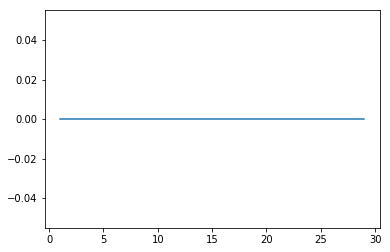

In [16]:
error=[]
for i in range (1,30):   
    AB.fit(X_train, y_train)
    y_pred = AB.predict(X_test)
    error.append(np.mean(y_pred!=y_test))
    
plt.plot(range(1,30),error)
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [18]:
print ('Accuracy_Bagging Classifier : ', accuracy_score(y_test,y_pred)*100,'%')

Accuracy_Bagging Classifier :  100.0 %
